## Descripción del proyecto

Este proyecto consiste en la visualización de un dashboard interactivo en Power BI, basado en datos de Google Trends, que permite identificar y analizar las principales búsquedas relacionadas con arquitectura durante los años 2023, 2024 y proyecciones para 2025. El objetivo es ayudar a profesionales, emprendedores y empresas del sector a comprender mejor las necesidades y preferencias del público, detectando oportunidades de negocio emergentes y comportamientos estacionales.

**Proyecto: Predicción tendencias arquitectónicas**:

**🎯Objetivo del Proyecto**:
Desarrollar un modelo de Machine Learning que permita predecir el interés futuro en ciertas tendencias arquitectónicas usando datos históricos de búsquedas (como los de Google Trends). Esto permitirá anticipar comportamientos y apoyar decisiones estratégicas en contenido, marketing o desarrollo de servicios arquitectónicos.

**🧠 Preguntas de Hipotesis**:
¿Qué tipo de servicios están más interesados en contratar un los clientes?
Quienes son? Que tendencias estan vigentes? Que servicios contratan? Que tipo de servicios buscan?

##  Descripción de los datos

#### Columnas clave
fecha (formato string) → Variable temporal.

13 columnas temáticas → Variables numéricas con volúmenes de interés (búsquedas) para cada tendencia:

Los datos son obtenidos de Google Trends estan representados por porcentaje de interés. 
- `arquitectura sostenible` - Volúmen de interes;
- `urbanismo`
- `diseño paramétrico` - 
- `ciudades inteligentes` 
- `casas pequeñas` 
- `tiny house`- 
- `diseño de interiores`- 
- `render 3D`- 
- `arquitectura moderna`- 
- `remodelación casa`- 
- `domótica`- 
- `planos de casas`- 
- `arquitectura minimalista`- 


### Condiciones:
#Convertir la columna objetivo "Fecha" en formato string:

Contratado → 1
No Contratado → 0

Característica objetivo: la columna 'Fecha'

Métrica principal: AUC-ROC.

Métrica adicional: exactitud.

Criterios de evaluación:

- AUC-ROC < 0.75 — 0 SP
- 0.75 ≤ AUC-ROC < 0.81 — 4 SP
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
- 0.85 ≤ AUC-ROC < 0.87 — 5 SP
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
- AUC-ROC ≥ 0.88 — 6 SP

## Análisis exploratorio de datos (Python)
- Una descripción general de los datos:
- Limpieza y tratamiento de valores nulos.

### Inicialización e importación de librerias 
    - Importar librerías de pandas para crear graficas
    - Leer el conjunto de datos utilizamos pd.read_csv

In [1]:
# Importar bibliotecas necesarias

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

### Cargar datasets
    - Identificamos el delimitador sep=";" para leer adecuadamente las tablas

In [2]:
# Cargar el CSV en un DataFrame
df = pd.read_csv('tendencias_arquitectura.csv')

In [3]:
# Mostrar las primeras filas
df.head()  

,fecha,arquitectura sostenible,urbanismo,diseño paramétrico,ciudades inteligentes,casas pequeñas,tiny house,diseño de interiores,render 3D,arquitectura moderna,remodelación casa,domótica,planos de casas,arquitectura minimalista
0,2023-04-02,57,56,58,50,57,56,58,50,80,22,24,57,49
1,2023-04-09,47,78,67,60,47,78,67,60,76,25,72,53,60
2,2023-04-16,59,52,64,45,59,52,64,45,46,50,47,64,33
3,2023-04-23,72,53,59,54,72,53,59,54,64,53,43,74,55
4,2023-04-30,46,48,45,48,46,48,45,48,59,36,34,65,52


In [4]:
# Imprime la información general/resumida sobre el DataFrame de contract
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   fecha                     105 non-null    object
 1   arquitectura sostenible   105 non-null    int64 
 2   urbanismo                 105 non-null    int64 
 3   diseño paramétrico        105 non-null    int64 
 4   ciudades inteligentes     105 non-null    int64 
 5   casas pequeñas            105 non-null    int64 
 6   tiny house                105 non-null    int64 
 7   diseño de interiores      105 non-null    int64 
 8   render 3D                 105 non-null    int64 
 9   arquitectura moderna      105 non-null    int64 
 10  remodelación casa         105 non-null    int64 
 11  domótica                  105 non-null    int64 
 12  planos de casas           105 non-null    int64 
 13  arquitectura minimalista  105 non-null    int64 
dtypes: int64(13), object(1)
me

In [5]:
# Renombramos las columnas para que el código se vea más coherente con su estilo.
df = df.rename(columns={
    'arquitectura sostenible': 'arquitectura_sostenible', 
    'diseño paramétrico': 'diseño_paramétrico',
    'ciudades inteligentes':'ciudades_inteligentes',
    'casas pequeñas': 'casas_pequeñas',
    'tiny house': 'tiny_house',
    'diseño de interiores': 'diseño_interior',
    'render 3D': 'render_3D',
    'arquitectura moderna': 'arquitectura_moderna',
    'remodelación casa': 'remodelación_casa',
    'planos de casas': 'planos_casas',
    'arquitectura minimalista': 'arquitectura_minimalista'
})
# actualizar indice
df.reset_index(drop=True, inplace=True)

In [6]:
df.columns

Index(['fecha', 'arquitectura_sostenible', 'urbanismo', 'diseño_paramétrico',
       'ciudades_inteligentes', 'casas_pequeñas', 'tiny_house',
       'diseño_interior', 'render_3D', 'arquitectura_moderna',
       'remodelación_casa', 'domótica', 'planos_casas',
       'arquitectura_minimalista'],
      dtype='object')

In [7]:
df.describe()

,arquitectura_sostenible,urbanismo,diseño_paramétrico,ciudades_inteligentes,casas_pequeñas,tiny_house,diseño_interior,render_3D,arquitectura_moderna,remodelación_casa,domótica,planos_casas,arquitectura_minimalista
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,47.561905,51.076190,50.247619,50.209524,47.561905,51.076190,50.247619,50.209524,48.333333,49.847619,47.609524,50.771429,53.028571
std,13.467856,14.943287,14.996654,13.569405,13.467856,14.943287,14.996654,13.569405,15.679891,15.015236,15.318726,14.339468,14.237989
min,10.000000,21.000000,1.000000,18.000000,10.000000,21.000000,1.000000,18.000000,15.000000,12.000000,9.000000,22.000000,17.000000
25%,40.000000,38.000000,40.000000,41.000000,40.000000,38.000000,40.000000,41.000000,37.000000,41.000000,39.000000,40.000000,42.000000
50%,47.000000,53.000000,51.000000,50.000000,47.000000,53.000000,51.000000,50.000000,48.000000,51.000000,47.000000,50.000000,53.000000
75%,55.000000,59.000000,61.000000,59.000000,55.000000,59.000000,61.000000,59.000000,59.000000,59.000000,58.000000,60.000000,61.000000
max,77.000000,100.000000,84.000000,82.000000,77.000000,100.000000,84.000000,82.000000,96.000000,86.000000,88.000000,89.000000,87.000000


### Exploración inicial de datos
    - Verificar info() para ver información de cada DataFrame 
    - Utlizamos head() para mostrar información del DataFrame
    - Utlizamos describe() para ver la descripción del DataFrame 

###  Preprocesamiento de los datos
    - Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
    - Verifica y corrige los tipos de datos con dtype() 
    - Identifica y completa valores ausentes con isna() sum()
    - Identifica y elimina los valores duplicados duplicated()  
    - Verificamos que los nombres esten bien escritos

In [8]:
# Verificar tipos de datos
df.dtypes

fecha                       object
arquitectura_sostenible      int64
urbanismo                    int64
diseño_paramétrico           int64
ciudades_inteligentes        int64
casas_pequeñas               int64
tiny_house                   int64
diseño_interior              int64
render_3D                    int64
arquitectura_moderna         int64
remodelación_casa            int64
domótica                     int64
planos_casas                 int64
arquitectura_minimalista     int64
dtype: object

In [9]:
# Revisar los valores en la columnna "clients"
df['fecha'].value_counts()

2024-03-03    1
2023-11-26    1
2024-03-10    1
2025-02-16    1
2023-12-24    1
             ..
2023-04-23    1
2024-04-28    1
2024-09-15    1
2023-07-30    1
2024-11-10    1
Name: fecha, Length: 105, dtype: int64

In [10]:
# Cargar y convertir fecha
df = pd.read_csv("tendencias_arquitectura.csv")
df['fecha'] = pd.to_datetime(df['fecha'])

# Verificar estructura
df.info()
df.set_index('fecha', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   fecha                     105 non-null    datetime64[ns]
 1   arquitectura sostenible   105 non-null    int64         
 2   urbanismo                 105 non-null    int64         
 3   diseño paramétrico        105 non-null    int64         
 4   ciudades inteligentes     105 non-null    int64         
 5   casas pequeñas            105 non-null    int64         
 6   tiny house                105 non-null    int64         
 7   diseño de interiores      105 non-null    int64         
 8   render 3D                 105 non-null    int64         
 9   arquitectura moderna      105 non-null    int64         
 10  remodelación casa         105 non-null    int64         
 11  domótica                  105 non-null    int64         
 12  planos de casas       

In [11]:
df.dtypes

arquitectura sostenible     int64
urbanismo                   int64
diseño paramétrico          int64
ciudades inteligentes       int64
casas pequeñas              int64
tiny house                  int64
diseño de interiores        int64
render 3D                   int64
arquitectura moderna        int64
remodelación casa           int64
domótica                    int64
planos de casas             int64
arquitectura minimalista    int64
dtype: object

In [12]:
# Verifica si hay valores nulos
df.isnull().sum()

arquitectura sostenible     0
urbanismo                   0
diseño paramétrico          0
ciudades inteligentes       0
casas pequeñas              0
tiny house                  0
diseño de interiores        0
render 3D                   0
arquitectura moderna        0
remodelación casa           0
domótica                    0
planos de casas             0
arquitectura minimalista    0
dtype: int64

## Análisis exploratorio:

- Visualizar la proporción de clientes contratados vs. no contratados.
- Analizar correlaciones entre variables para ver qué influye más en la contratación.

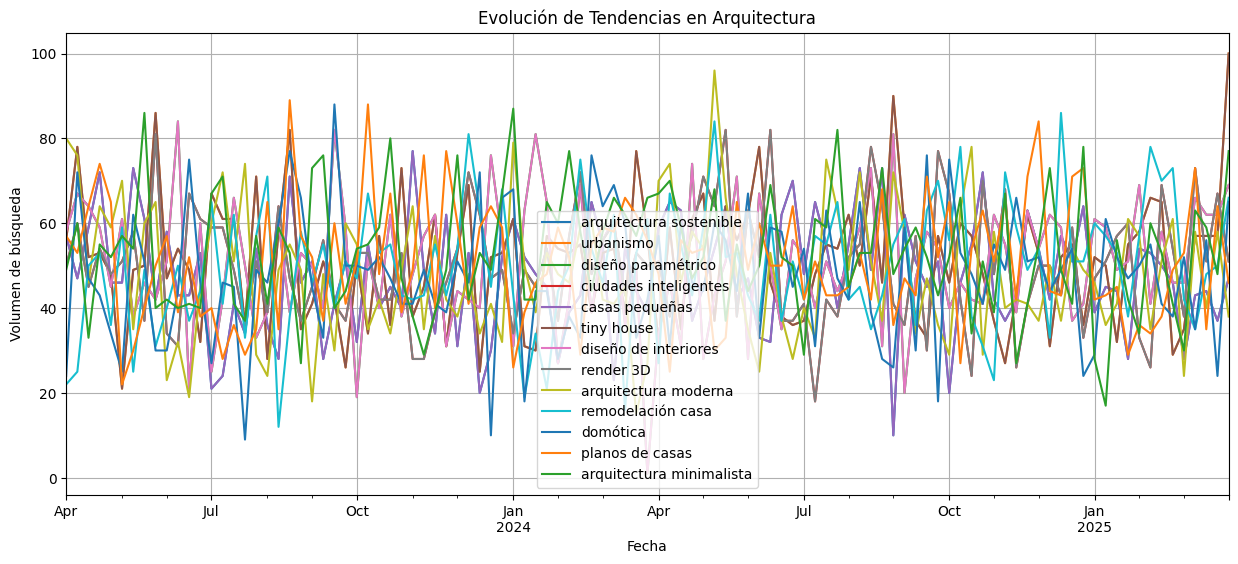

In [13]:
# 1. Visualizar la proporción de clientes contratados vs. no contratados
import matplotlib.pyplot as plt

df.plot(figsize=(15, 6), title="Evolución de Tendencias en Arquitectura")
plt.ylabel("Volumen de búsqueda")
plt.xlabel("Fecha")
plt.grid(True)
plt.show()

### Modelado predictivo (ejemplo: predicción de “arquitectura sostenible”)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Variables predictoras y target
X = df.drop(columns=["arquitectura sostenible"])
y = df["arquitectura sostenible"]

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Entrenamiento del modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse:.2f}")

Error cuadrático medio: 0.18


### Visualización de resultados

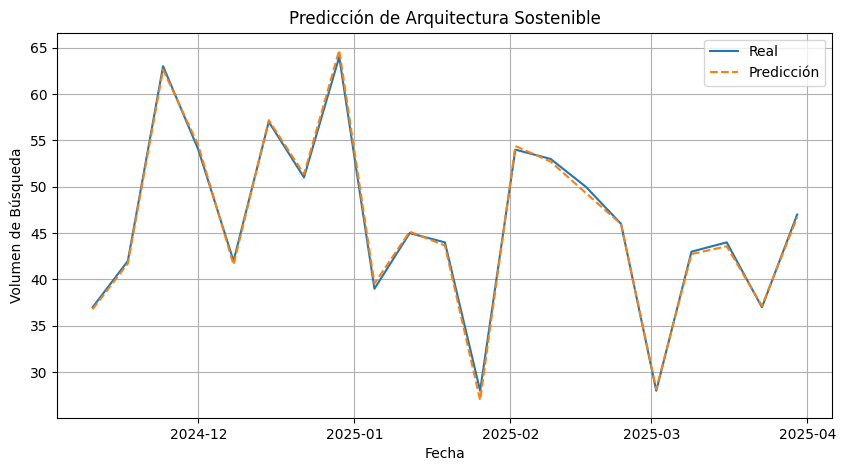

In [15]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label="Real")
plt.plot(y_test.index, y_pred, label="Predicción", linestyle='--')
plt.title("Predicción de Arquitectura Sostenible")
plt.xlabel("Fecha")
plt.ylabel("Volumen de Búsqueda")
plt.legend()
plt.grid(True)
plt.show()


### Preparación para modelado
Primero necesitamos una variable objetivo (target). Identificar cuándo el interés supera cierto umbral.

In [22]:
# Crear variable binaria: 1 si 'interes' está sobre el percentil 75, si no 0
umbral = df['arquitectura moderna'].quantile(0.75)
df['target'] = (df['arquitectura moderna'] > umbral).astype(int)

# Mostrar la distribución de la nueva variable objetivo
print(df['target'].value_counts())


0    80
1    25
Name: target, dtype: int64


### Probar modelos predictivos 
- Modelos: Árbol de decisión y Regresión logística

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Árbol de Decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Árbol de decisión:\n", classification_report(y_test, y_pred_tree))

# Regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Regresión logística:\n", classification_report(y_test, y_pred_logreg))


Árbol de decisión:
               precision    recall  f1-score   support

          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         0
          39       0.50      1.00      0.67         1
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       1.00      1.00      1.00         1
          43       1.00      1.00      1.00         2
          44       1.00      1.00      1.00         1
          45       1.00      1.00      1.00         1
          46       0.50      0.33      0.40         3
          47       1.00      1.00      1.00         1
       

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.

### Validación cruzada y ajuste de hiperparámetros (GridSearchCV)

In [57]:
df

,arquitectura sostenible,urbanismo,diseño paramétrico,ciudades inteligentes,casas pequeñas,tiny house,diseño de interiores,render 3D,arquitectura moderna,remodelación casa,domótica,planos de casas,arquitectura minimalista,target
fecha,,,,,,,,,,,,,,
2023-04-02,57,56,58,50,57,56,58,50,80,22,24,57,49,1
2023-04-09,47,78,67,60,47,78,67,60,76,25,72,53,60,1
2023-04-16,59,52,64,45,59,52,64,45,46,50,47,64,33,0
2023-04-23,72,53,59,54,72,53,59,54,64,53,43,74,55,1
2023-04-30,46,48,45,48,46,48,45,48,59,36,34,65,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-02,28,35,46,38,28,35,46,38,24,42,52,53,30,0
2025-03-09,43,57,66,73,43,57,66,73,58,35,35,73,63,0
2025-03-16,44,57,62,51,44,57,62,51,40,48,56,35,59,0


In [59]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Definir X y y de acuerdo a tu dataset
X = df.drop('target', axis=1)  # Elimina la columna 'fecha' ya que no es predictora
y = df['casas pequeñas']  # Usar alguna columna de interés como objetivo

# Definir el objeto de validación cruzada estratificada (StratifiedKFold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid para árbol de decisión
param_grid_tree = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [4, 5, 10]
}

# Ajuste de hiperparámetros para Árbol de Decisión
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=cv, scoring='accuracy')
grid_tree.fit(X, y)

print("Mejores parámetros Árbol:", grid_tree.best_params_)
print("Mejor score Árbol:", grid_tree.best_score_)

# Validación cruzada en regresión logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
scores = cross_val_score(logreg, X, y, cv=cv, scoring='accuracy')
print("Accuracy promedio Regresión Logística (CV):", scores.mean())


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Mejores parámetros Árbol: {'max_depth': 10, 'min_samples_split': 4}
Mejor score Árbol: 0.5809523809523809


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Accuracy promedio Regresión Logística (CV): 0.08571428571428572


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Grid para árbol de decisión
param_grid_tree = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [4, 5, 10]
}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)

print("Mejores parámetros Árbol:", grid_tree.best_params_)
print("Mejor score Árbol:", grid_tree.best_score_)

# Validación cruzada en regresión logística
scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print("Accuracy promedio Regresión Logística (CV):", scores.mean())


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Mejores parámetros Árbol: {'max_depth': 10, 'min_samples_split': 4}
Mejor score Árbol: 0.41047619047619044


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Accuracy promedio Regresión Logística (CV): 0.06666666666666667


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Analizar correlaciones entre variables
La correlación nos ayuda a identificar qué variables tienen mayor impacto en las tendencias.

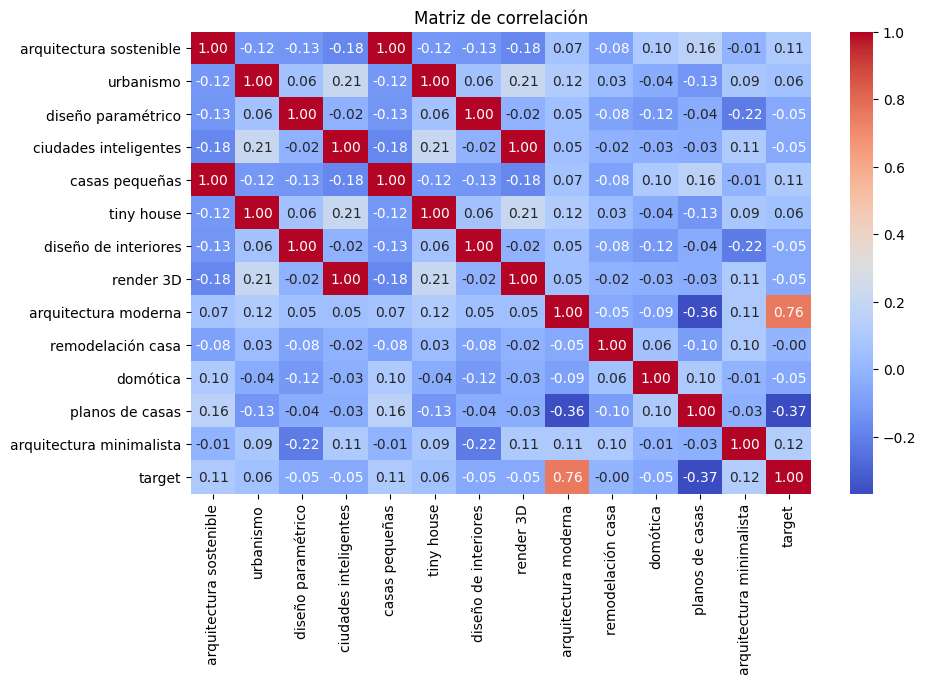

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
corr = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


- Interpretación de los valores de correlación:
- La correlación va de -1 a 1:
- Cercano a 1 → Fuerte correlación positiva (cuando la variable aumenta, la contratación también).
- Cercano a -1 → Fuerte correlación negativa (cuando la variable aumenta, la contratación disminuye).
- Cercano a 0 → No hay una relación clara entre la variable y la contratación.

### División de los datos

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Modelos predictivos: Árbol de decisión y Regresión logística

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Árbol de decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Regresión logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluación
print("Árbol de decisión:\n", classification_report(y_test, y_pred_tree))
print("Regresión logística:\n", classification_report(y_test, y_pred_logreg))


Árbol de decisión:
               precision    recall  f1-score   support

          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         0
          39       0.50      1.00      0.67         1
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       1.00      1.00      1.00         1
          43       1.00      1.00      1.00         2
          44       1.00      1.00      1.00         1
          45       1.00      1.00      1.00         1
          46       0.50      0.33      0.40         3
          47       1.00      1.00      1.00         1
       

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined a

### Ajuste de parámetros (Grid Search) + Validación cruzada

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Crear un pipeline con escalador + regresión logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [46]:
# Usar solo 3 folds si hay clases con muy pocos ejemplos
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=20), param_grid_tree, cv=3)
grid_tree.fit(X_train, y_train)

print("Mejores parámetros Árbol de Decisión:", grid_tree.best_params_)

# Validación cruzada regresión logística
scores = cross_val_score(pipeline, X, y, cv=3)
print("Score CV Regresión Logística:", scores.mean())


Mejores parámetros Árbol de Decisión: {'max_depth': None, 'min_samples_split': 2}
Score CV Regresión Logística: 0.09523809523809523


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


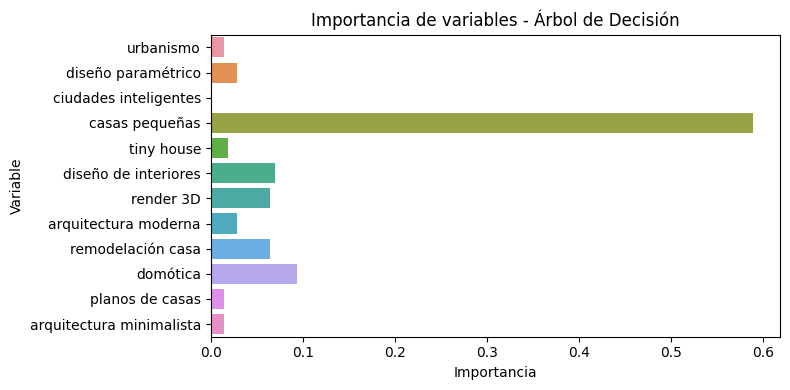

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importancia de variables del mejor modelo de árbol
importances = grid_tree.best_estimator_.feature_importances_
features = X.columns

# Visualización
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=features)
plt.title('Importancia de variables - Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


In [50]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Grid Search para Árbol de Decisión
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5)
grid_tree.fit(X_train, y_train)

print("Mejores parámetros Árbol de Decisión:", grid_tree.best_params_)

# Validación cruzada Regresión Logística
scores = cross_val_score(logreg, X, y, cv=5)
print("Score CV Regresión Logística:", scores.mean())


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Mejores parámetros Árbol de Decisión: {'max_depth': None, 'min_samples_split': 2}


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Score CV Regresión Logística: 0.06666666666666667


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


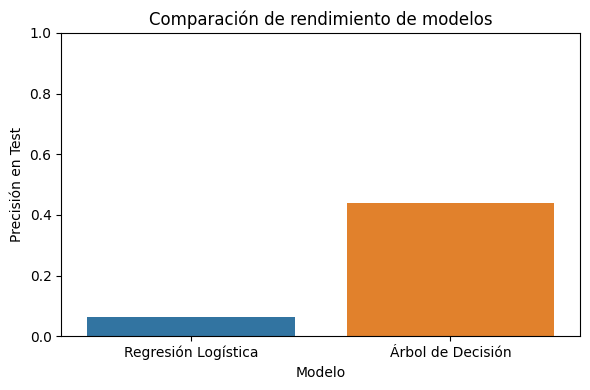

In [54]:
# Entrenar pipeline de regresión logística
pipeline.fit(X_train, y_train)

# Scores en el set de prueba
score_logreg = pipeline.score(X_test, y_test)
score_tree = grid_tree.score(X_test, y_test)

# Comparación de modelos
model_scores = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Árbol de Decisión'],
    'Score en Test': [score_logreg, score_tree]
})

# Visualización
plt.figure(figsize=(6, 4))
sns.barplot(x='Modelo', y='Score en Test', data=model_scores)
plt.ylim(0, 1)
plt.title('Comparación de rendimiento de modelos')
plt.ylabel('Precisión en Test')
plt.tight_layout()
plt.show()


##  Conclusiones del Proyecto 

**🧠 Conclusiones del Análisis de Tendencias en Arquitectura**:
Mayor interés en estilos arquitectónicos específicos
Los estilos más buscados entre 2023 y 2025 son:

**Arquitectura Minimalista (35,61%)**

**Moderna (32,46%)**

**Sostenible (31,94%)**
Esto muestra una clara preferencia por diseños simples, modernos y conscientes del medio ambiente.

Fuerte crecimiento en **“Diseño de interiores”**
Aumenta significativamente en 2024 y 2025, consolidándose como una tendencia con alta demanda dentro del rubro.

Interés en **“Remodelación de casas”**
Esta categoría mantiene un alto volumen de búsquedas, lo que sugiere oportunidades para servicios de renovación y adaptación de espacios.

Tendencias emergentes: **“Ciudades inteligentes” y “Domótica”**
Aunque tienen menor volumen en comparación con otras, su crecimiento constante sugiere un cambio hacia espacios urbanos más conectados y eficientes tecnológicamente.

Meses con mayor actividad
La mayor cantidad de búsquedas se concentra en enero, febrero y marzo, lo que puede indicar un patrón estacional donde los usuarios planean reformas o nuevos proyectos a inicios de año.